# Theis Type Curve & Data sheets
This notebook is intended to draw the necessary plots for graphical pumping test evaluation methods. Plots will be saved in a subfolder. Size and appearance of the plots can be adapted.

## Introduction

### General situation
We consider a confined aquifer with constant transmissivity. If a well is pumping water out of the aquifer, radial flow towards the well is induced. The hydraulics are described by the following simplified flow equation. This equation accounts for 1D radial transient flow towards a fully penetrating well within a confined aquifer without further sinks and sources:

$$ \frac{\partial^2 h}{\partial r^2}+\frac{1}{r}\frac{\partial h}{\partial r}=\frac{S}{T}\frac{\partial h}{\partial t} $$

### Solution by Theis
Charles V. Theis presented a solution for this by deriving

$$ s(r,t)=\frac{Q}{4\pi T}W(u) $$

with the well function

$$ W(u) = \int_{u }^{+\infty} \frac{e^{-\tilde u}}{\tilde u}d\tilde u $$

and the dimensionless variable 

$$ u = \frac{Sr^2}{4Tt} $$

This equations are not easy to solve. Historically, values for the well function were provided by tables or as so called type-curve. The type-curve matching with experimental data for pumping test analysis can be considered as one of the basic hydrogeological methods.

However, modern computer provide an easier and more convinient way to solve the 1D radial flow equation based on the Theis approach.

### Computation

Subsequently, the computation is done by general mathematical routines. It is not necessary to understand all details (although the code reveals them). But the application of those methods for pumping test data is of great practical importance.

- Subsequently, parts that are not essential for understanding are marked with *(italic text in brackets)*. You need to run those cells but you don't necessarily need read the code.

- Necessary parts come in **bold text**.

*(First, the necessary Python functions are initiated.)*

In [301]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import os

save_dir = ('C:/GVG460/T07/THEIS_CURVE/')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

**The following section stores the measured data.**

This are two lists with time (in minutes) and drawdown (in meters). Make sure that those elements match each other (e.g. the first time is associated with the first drawdown value etc.). Here, the data from Fetter are used whereas here drawdown is given in meters (1 feet = 0.3048m).

Currently, two data sets are provided (_hint: you can 'deactivate' data by commenting them out by using the **#**-symbol_)

In [363]:
# DATA FROM FETTER (TABLE 5.1), TRANSFERED FROM FEET TO METER
# Q = 42400 ft3/d, r = 824 ft
m_time = [3,5,8,12,20,24,30,38,47,50,60,70,80,90,100,130,160,200,260,320,380,500] # time in minutes
m_ddown = [0.093,0.216,0.401,0.648,0.987,1.110,1.264,1.449,1.573,1.635,1.758,1.881,1.943,2.066,2.159,2.313,2.560,2.621,2.837,2.991,3.146,3.362]   # drawdown in meters

# DATA FROM SCHWARTZ & ZHANG
# Q = 500 m3/d, r = 300 m
#m_time = [1,1.27,1.61,2.04,2.59,3.29,4.18,5.3,6.72,8.53,10.83,13.74,17.43,22.12,28.07,35.62,45.2,57.36,72.79,92.37,117.21,148.74,188.74,239.5,303.92,385.66,489.39,621.02,788.05,1000] # time in minutes
#m_ddown = [0.03,0.05,0.09,0.15,0.22,0.31,0.41,0.53,0.66,0.8,0.95,1.11,1.27,1.44,1.61,1.79,1.97,2.15,2.33,2.52,2.7,2.89,3.07,3.26,3.45,3.64,3.83,4.02,4.21,4.39]   # drawdown in meters

*(Here the necessary functions like the well function $W(u)$ are defined. Later, those functions are used in the computation)*

In [364]:
#Define a function, class, and object for Theis Well analysis

def well_function(u):
    return scipy.special.exp1(u)

def theis_u(T,S,r,t):
    u = r ** 2 * S / 4. / T / t
    return u

def theis_s(Q, T, u):
    s = Q / 4. / np.pi / T * well_function(u)
    return s

def theis_wu(Q, T, s):
    wu = s * 4. * np.pi * T / Q
    return wu

*(Here, the methode computes the data for the well function. Those data can be used to generate a type curve.)*

In [365]:
u_max = 10
r_max = 1000000
u  = [u_max for x in range(r_max)]
um = [u_max for x in range(r_max)]
u_inv  = [r_max/u_max for x in range(r_max)]
um_inv = [r_max/u_max for x in range(r_max)]
w_u  = [well_function(u_max/r_max) for x in range(r_max)]
w_um = [well_function(u_max/r_max) for x in range(r_max)]

for x in range(1,r_max,1):
    if x>0:
        u[x] = x*u_max/r_max
        u_inv[x] = 1/u[x]
        w_u[x] = well_function(u[x])

## Plotting the Theis Type Curve
The next section is to plot the Theis Type Curve. A matching point can be defined by providing 'easy' values for w(u) and 1/u

<function matplotlib.pyplot.show(*args, **kw)>

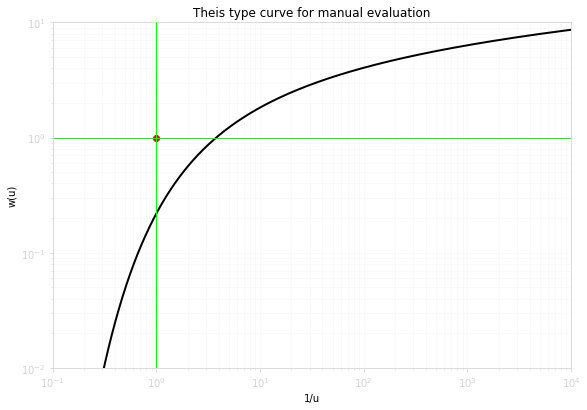

In [366]:
# W(u) is match_wu and 1/u is match_uinv
match_u_inv=1
match_wu=1
matchgrid_x=[match_u_inv, match_u_inv]
matchgrid_y=[match_wu, match_wu]
matchgrid  =[0.001, 1000000]

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)  # adjust plot area

#plot the data
ax.plot(u_inv, w_u, color = 'black', linewidth = 2)
ax.plot(match_u_inv, match_wu,'ro',markersize=6)
ax.plot(matchgrid_x,matchgrid,color ='lime', linewidth = 1)
ax.plot(matchgrid,matchgrid_y,color = 'lime', linewidth = 1)

#set up the diagramm
plt.yscale("log")
plt.xscale("log")
plt.axis([0.1,1E4,1E-2,1E+1])
ax.set(xlabel='1/u', ylabel='w(u)',
       title='Theis type curve for manual evaluation')
ax.grid(which="both",color='whitesmoke', linewidth=0.5)

#box around plot
ax.spines['top'].set_color('lightgrey')
ax.spines['bottom'].set_color('lightgrey')
ax.spines['right'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')

ax.tick_params(which='both', colors='lightgrey')

plt.savefig(save_dir+'TYPE_CURVE.png', dpi=300)
plt.show

**Subsequently, the given data for the processing of measured data are provided.**

This are the given data like
- pumping rate $Q$,
- aquifer thickness $b$,
- distance of the observation (where time and drawdown were measured) to the pumping well $r$.

**These data can be adjusted for individual measurements.**

First, plot and save the measured data

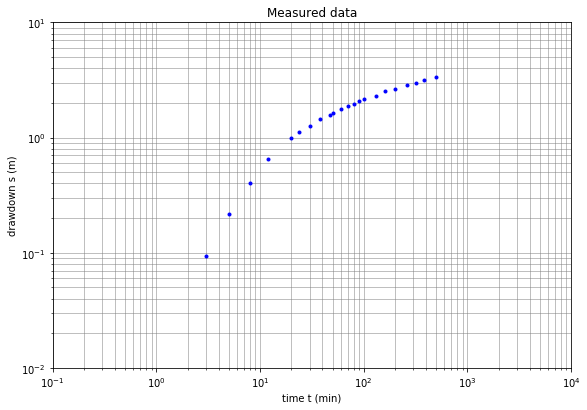

In [367]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)  # adjust plot area
ax.plot(m_time, m_ddown,'bo', markersize=3)
plt.yscale("log")
plt.xscale("log")
plt.axis([0.1,1E4,1E-2,1E+1])
ax.set(xlabel='time t (min)', ylabel='drawdown s (m)',
       title='Measured data')
ax.grid(which="both", color='grey',linewidth=0.5)
plt.savefig(save_dir+'MEASURED.png', transparent='true', dpi=300)
plt.show()

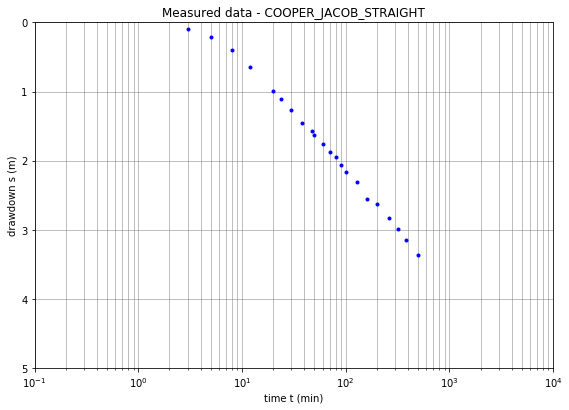

In [375]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)  # adjust plot area
ax.plot(m_time, m_ddown,'bo', markersize=3)
plt.xscale("log")
plt.axis([0.1,1E4,5,0])
ax.set(xlabel='time t (min)', ylabel='drawdown s (m)',
       title='Measured data - COOPER_JACOB_STRAIGHT')
ax.grid(which="both", color='grey',linewidth=0.5)
plt.savefig(save_dir+'COOPER_JACOB_STRAIGHT.png', transparent='true', dpi=300)
plt.show()

## Manual fitting
- Now you should go to the previously defined folder (variable 'save_dir' in the first code-box; presetting is C:/GVG460/T07...) where the type curve and the measured data are saved;
- Print or load this figures to a suitable methode (for example in MS-Word or MS-EXCEL);
- If the matching point and the range of the axis doesnt fit your data, adjust (in the previous code boxes) and replot;
- make sure, that both figures come with the same amount of log-cycles on the x- and y-axis;
- make sure, that both figures are of same size;
- fit the type-curve and the measured-data-plot as best as possible;
- Note the t and s value, where the matchpoint from the type-curve intersects the measured-data-plot;
- this t and s values are necessary for further processing.

## Details of the computation
By fitting the type curve and the measured data and under consideration of the matching point, the values of t and s can be derived from the plots. Those parameters can be used to further compute transmissivity T and storativity S by the following equations

$$ T=\frac{Q}{4\pi s}W(u) $$

and subsequently

$$ S = \frac{4Tt}{r^2}u $$



## DATA PROCESSING & CHECK
Under consideration of the pumping test data (extraction rate Q and distance r between pumping well and observation, the formation parameter can be computed. The next section is to check the manual parameter estimation. Estimated data (T and S) are set in a common plot. If the manual estimation was successful, measured data and type curve in the automatic plot will fit.

**FIRST, DEFINE THE PARAMETERS AND THE MANUALLY ESTIMATED DATA (t / s) HERE. MAKE SURE THE UNITS ARE CONSISTENT (e.g. METERS / SECONDS)**

In [368]:
# Test data here; probably convert from feet / minutes / days etc.
r = 824*0.3048
Q = 42400*0.3048**3/86400

# Graphically estimated parameter here
t_est = 4.2*60
s_est = 0.81

In [369]:
# Compute Transmissivity and Storativity
T = Q * match_wu/(4*np.pi*s_est)
S = 4*t_est*T/r**2/match_u_inv

print("Distance       r = ",'{:.2f}'.format(r), "m")
print("Pumpingrate    Q = ",'{:.2e}'.format(Q), "m3/s")
print("Transmissivity T = ",'{:.2e}'.format(T), "m2/s")
print("Storativity    S = ",'{:.2e}'.format(S), "[-]")

Distance       r =  251.16 m
Pumpingrate    Q =  1.39e-02 m3/s
Transmissivity T =  1.37e-03 m2/s
Storativity    S =  2.18e-05 [-]


**Plot the match between type curve and measured data to check the manual estimation**


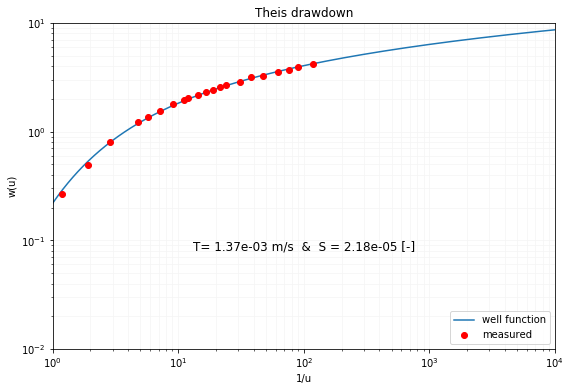

In [370]:
#GENERATE THE TYPE CURVE AND PLOT THE MEASURED DATA
x = 0
for t in m_time:
    um[x] = theis_u(T,S,r,t*60)
    um_inv[x] = 1/um[x]
    w_um[x] = theis_wu(Q,T,m_ddown[x])
    x = x+1

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(u_inv, w_u)
ax.plot(um_inv, w_um,'ro')
plt.yscale("log")
plt.xscale("log")
plt.axis([1,1E4,1E-2,1E+1])
plot_text = "T= " + str('{:.2e}'.format(T))+ " m/s  &  S = " + str('{:.2e}'.format(S))+" [-]"
plt.text(100, 0.1,plot_text,horizontalalignment='center',verticalalignment='top',multialignment='center', size='12')
ax.set(xlabel='1/u', ylabel='w(u)',title='Theis drawdown')
ax.grid(which="both",color='whitesmoke')
plt.legend(('well function','measured'), loc=4)
plt.savefig(save_dir+'CHECK_THEIS_MANUAL.png', dpi=300)
plt.show()